In [1]:
# Cell 1: Setup and Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import sys

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

# Add simstack4 to path if needed (for notebooks in simstack4/notebooks/)
sys.path.insert(0, str(Path.cwd().parent / 'src'))

print("📚 Imports complete")
print(f"📁 Current directory: {Path.cwd()}")

📚 Imports complete
📁 Current directory: /Users/mviero/Repositories/simstack4/notebooks


In [2]:
timestamp_results = '20250608_150617'
timestamp_results = '20250608_155959'
timestamp_results = '20250608_162449'
timestamp_results = '20250608_163516'
path_results = os.environ["PICKLESPATH"]
file_results = f"cosmos25_bootstrap_{timestamp_results}_detailed.pkl"

In [3]:
print(os.path.isfile(os.path.join(path_results,'simstack','stacked_flux_densities',file_results)))

True


In [4]:
# Cell 2: Find and Load Results
def find_latest_results(results_dir=None, timestamp='20250608_150617'):
    """Find the most recent COSMOS stacking results"""
    
    if results_dir is None:
        # Default results directory (adjust if different)
        results_dir = Path.home() / "data" / "Astronomy" / "simstack" / "stacked_flux_densities"
    else:
        results_dir = Path(results_dir)
    
    if not results_dir.exists():
        print(f"❌ Results directory not found: {results_dir}")
        print("Please specify the correct path to your results")
        return None
    
    # Find COSMOS bootstrap results
    cosmos_files = list(results_dir.glob("cosmos25_bootstrap_*_summary.csv"))
    
    if not cosmos_files:
        print(f"❌ No COSMOS bootstrap results found in {results_dir}")
        print("Available files:")
        for f in results_dir.glob("*"):
            print(f"  • {f.name}")
        return None
    
    # Get the most recent file
    latest_summary = max(cosmos_files, key=lambda x: x.stat().st_mtime)
    
    # Find corresponding detailed results
    if timestamp is None:
        timestamp = latest_summary.stem.split('_')[-2] + '_' + latest_summary.stem.split('_')[-1]
    detailed_file = results_dir / f"cosmos25_bootstrap_{timestamp}_detailed.pkl"
    config_file = results_dir / f"cosmos25_bootstrap_{timestamp}_config.toml"
    
    print(f"✅ Found latest results from: {latest_summary.stem}")
    print(f"📊 Summary file: {latest_summary.name}")
    
    results = {
        'summary_file': latest_summary,
        'detailed_file': detailed_file if detailed_file.exists() else None,
        'config_file': config_file if config_file.exists() else None,
        'timestamp': timestamp
    }
    
    return results

In [5]:
results_info=find_latest_results(
    results_dir=os.path.join(path_results,'simstack','stacked_flux_densities'),
    timestamp=timestamp_results
)

✅ Found latest results from: cosmos25_bootstrap_20250608_163516_summary
📊 Summary file: cosmos25_bootstrap_20250608_163516_summary.csv


In [6]:
results_info

{'summary_file': PosixPath('/Users/mviero/data/Astronomy/pickles/simstack/stacked_flux_densities/cosmos25_bootstrap_20250608_163516_summary.csv'),
 'detailed_file': PosixPath('/Users/mviero/data/Astronomy/pickles/simstack/stacked_flux_densities/cosmos25_bootstrap_20250608_163516_detailed.pkl'),
 'config_file': None,
 'timestamp': '20250608_163516'}

In [7]:
# Cell 3: Load Summary Data
if results_info:
    # Load summary table
    summary_df = pd.read_csv(results_info['summary_file'])
    
    print(f"📊 COSMOS Stacking Results Summary")
    print(f"📅 Timestamp: {results_info['timestamp']}")
    print(f"🔢 Total populations: {len(summary_df):,}")
    
    # Basic statistics
    detected = summary_df[summary_df['total_ir_luminosity_lsun'] > 0]
    print(f"✨ Detections (L_IR > 0): {len(detected):,} ({len(detected)/len(summary_df)*100:.1f}%)")
    
    # Show column info
    print(f"\n📋 Available columns ({len(summary_df.columns)}):")
    for i, col in enumerate(summary_df.columns):
        print(f"  {i+1:2d}. {col}")
    
    # Show data sample
    print(f"\n🔍 Data sample (first 3 rows):")
    display(summary_df.head(3))
    
    # Show detection statistics
    if len(detected) > 0:
        print(f"\n📈 Detection Statistics:")
        print(f"  L_IR range: {detected['total_ir_luminosity_lsun'].min():.2e} - {detected['total_ir_luminosity_lsun'].max():.2e} L☉")
        if 'sfr_msun_yr' in detected.columns:
            print(f"  SFR range:  {detected['sfr_msun_yr'].min():.2e} - {detected['sfr_msun_yr'].max():.2e} M☉/yr")
        if 'n_sources' in detected.columns:
            print(f"  Sources per population: {detected['n_sources'].min()} - {detected['n_sources'].max()}")

else:
    print("❌ No results loaded")


📊 COSMOS Stacking Results Summary
📅 Timestamp: 20250608_163516
🔢 Total populations: 118
✨ Detections (L_IR > 0): 105 (89.0%)

📋 Available columns (8):
   1. population_id
   2. n_sources
   3. median_redshift
   4. median_log_mass
   5. n_bands
   6. total_ir_luminosity_lsun
   7. sfr_msun_yr
   8. specific_sfr_yr

🔍 Data sample (first 3 rows):


,population_id,n_sources,median_redshift,median_log_mass,n_bands,total_ir_luminosity_lsun,sfr_msun_yr,specific_sfr_yr
0,redshift_0.01_0.50__stellar_mass_8.5_9.5__split_0,2104,0.3699,8.798365,5,0.019975,1.997544e-12,3.177836e-21
1,redshift_0.01_0.50__stellar_mass_8.5_9.5__split_1,3505,0.3313,8.903150,5,0.007675,7.675377e-13,9.592895e-22
2,redshift_0.01_0.50__stellar_mass_9.5_10.0__spl...,193,0.3339,9.699740,5,0.006725,6.725416e-13,1.342701e-22



📈 Detection Statistics:
  L_IR range: 8.37e-07 - 4.55e+01 L☉
  SFR range:  8.37e-17 - 4.55e-09 M☉/yr
  Sources per population: 1 - 24439


In [8]:
# Cell 4: Load Detailed Results (if available)
detailed_results = None

if results_info and results_info['detailed_file'] and results_info['detailed_file'].exists():
    try:
        with open(results_info['detailed_file'], 'rb') as f:
            detailed_results = pickle.load(f)
        
        print("✅ Detailed results loaded!")
        print(f"📦 Type: {type(detailed_results)}")
        
        # Explore the detailed results structure
        if hasattr(detailed_results, '__dict__'):
            print(f"📋 Available attributes:")
            for attr in dir(detailed_results):
                if not attr.startswith('_'):
                    print(f"  • {attr}")
        
        # Try to access specific components
        if hasattr(detailed_results, 'stacking_results'):
            stacking = detailed_results.stacking_results
            print(f"\n🎯 Stacking results available:")
            if hasattr(stacking, 'flux_densities'):
                print(f"  • Maps: {list(stacking.flux_densities.keys())}")
                print(f"  • Populations: {len(stacking.population_labels)}")
                
    except Exception as e:
        print(f"⚠️  Could not load detailed results: {e}")
        detailed_results = None

else:
    print("ℹ️  No detailed results file found - using summary data only")


✅ Detailed results loaded!
📦 Type: <class 'dict'>


In [9]:
# Cell 5: Data Preparation for Plotting
if 'summary_df' in locals():
    # Separate star-forming and quiescent populations
    df = summary_df.copy()
    
    # Parse population information
    if 'population_id' in df.columns:
        # Extract population type (split_0 = star-forming, split_1 = quiescent)
        df['population_type'] = df['population_id'].apply(
            lambda x: 'Star-forming' if 'split_0' in x else 'Quiescent' if 'split_1' in x else 'Unknown'
        )
        
        # Extract redshift and mass information from population ID
        def extract_z_mass(pop_id):
            try:
                parts = pop_id.split('__')
                z_part = [p for p in parts if p.startswith('redshift_')][0]
                mass_part = [p for p in parts if p.startswith('stellar_mass_')][0]
                
                z_range = z_part.replace('redshift_', '').split('_')
                mass_range = mass_part.replace('stellar_mass_', '').split('_')
                
                z_center = (float(z_range[0]) + float(z_range[1])) / 2
                mass_center = (float(mass_range[0]) + float(mass_range[1])) / 2
                
                return z_center, mass_center
            except:
                return np.nan, np.nan
        
        df[['z_center', 'mass_center']] = df['population_id'].apply(
            lambda x: pd.Series(extract_z_mass(x))
        )
    
    # Create detection flag
    df['detected'] = df['total_ir_luminosity_lsun'] > 0
    
    # Filter to detected populations for plotting
    detected_df = df[df['detected']].copy()
    
    print(f"📊 Data prepared for plotting:")
    print(f"  • Total populations: {len(df):,}")
    print(f"  • Detected populations: {len(detected_df):,}")
    
    if 'population_type' in df.columns:
        type_counts = df['population_type'].value_counts()
        detected_type_counts = detected_df['population_type'].value_counts()
        
        print(f"  • Population types:")
        for ptype in type_counts.index:
            total = type_counts[ptype]
            detected_count = detected_type_counts.get(ptype, 0)
            print(f"    - {ptype}: {detected_count}/{total} detected ({detected_count/total*100:.1f}%)")

# =============================================================================


📊 Data prepared for plotting:
  • Total populations: 118
  • Detected populations: 105
  • Population types:
    - Star-forming: 57/60 detected (95.0%)
    - Quiescent: 48/58 detected (82.8%)


In [10]:
# Cell 6: Quick Plotting Functions
def plot_detections_summary():
    """Plot overview of detections"""
    if 'detected_df' not in locals() or len(detected_df) == 0:
        print("❌ No detections to plot")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('COSMOS Stacking Results Overview', fontsize=16, fontweight='bold')
    
    # 1. L_IR distribution
    ax1 = axes[0, 0]
    detected_df['total_ir_luminosity_lsun'].hist(bins=30, alpha=0.7, ax=ax1)
    ax1.set_xlabel('Total IR Luminosity (L☉)')
    ax1.set_ylabel('Number of Populations')
    ax1.set_title('IR Luminosity Distribution')
    ax1.set_xscale('log')
    
    # 2. SFR distribution (if available)
    ax2 = axes[0, 1]
    if 'sfr_msun_yr' in detected_df.columns:
        detected_df['sfr_msun_yr'].hist(bins=30, alpha=0.7, ax=ax2)
        ax2.set_xlabel('SFR (M☉/yr)')
        ax2.set_ylabel('Number of Populations')
        ax2.set_title('Star Formation Rate Distribution')
        ax2.set_xscale('log')
    else:
        ax2.text(0.5, 0.5, 'SFR data not available', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Star Formation Rate')
    
    # 3. Population types (if available)
    ax3 = axes[1, 0]
    if 'population_type' in detected_df.columns:
        type_counts = detected_df['population_type'].value_counts()
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
        type_counts.plot(kind='bar', ax=ax3, color=colors[:len(type_counts)])
        ax3.set_xlabel('Population Type')
        ax3.set_ylabel('Number of Detections')
        ax3.set_title('Detections by Population Type')
        ax3.tick_params(axis='x', rotation=45)
    else:
        ax3.text(0.5, 0.5, 'Population type data not available', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Population Types')
    
    # 4. Sources per population
    ax4 = axes[1, 1]
    if 'n_sources' in detected_df.columns:
        detected_df['n_sources'].hist(bins=30, alpha=0.7, ax=ax4, color='green')
        ax4.set_xlabel('Number of Sources')
        ax4.set_ylabel('Number of Populations')
        ax4.set_title('Sources per Population')
        ax4.set_xscale('log')
    else:
        ax4.text(0.5, 0.5, 'Source count data not available', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Sources per Population')
    
    plt.tight_layout()
    plt.show()

def plot_redshift_mass_grid():
    """Plot L_IR as function of redshift and stellar mass"""
    if 'detected_df' not in locals() or len(detected_df) == 0:
        print("❌ No detections to plot")
        return
    
    if 'z_center' not in detected_df.columns or 'mass_center' not in detected_df.columns:
        print("❌ Redshift/mass center data not available")
        return
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Color by L_IR
    scatter = axes[0].scatter(
        detected_df['z_center'], 
        detected_df['mass_center'],
        c=detected_df['total_ir_luminosity_lsun'],
        s=60, alpha=0.7, cmap='viridis',
        norm=plt.LogNorm()
    )
    
    axes[0].set_xlabel('Redshift (bin center)')
    axes[0].set_ylabel('Stellar Mass (log M☉, bin center)')
    axes[0].set_title('IR Luminosity vs Redshift & Stellar Mass')
    
    cbar = plt.colorbar(scatter, ax=axes[0])
    cbar.set_label('L_IR (L☉)')
    
    # Color by population type
    if 'population_type' in detected_df.columns:
        colors = {'Star-forming': '#FF6B6B', 'Quiescent': '#4ECDC4', 'Unknown': '#95A5A6'}
        for ptype in detected_df['population_type'].unique():
            mask = detected_df['population_type'] == ptype
            axes[1].scatter(
                detected_df.loc[mask, 'z_center'],
                detected_df.loc[mask, 'mass_center'],
                c=colors.get(ptype, '#95A5A6'),
                label=ptype, s=60, alpha=0.7
            )
        
        axes[1].set_xlabel('Redshift (bin center)')
        axes[1].set_ylabel('Stellar Mass (log M☉, bin center)')
        axes[1].set_title('Detections by Population Type')
        axes[1].legend()
    
    plt.tight_layout()
    plt.show()

print("🎨 Plotting functions ready!")
print("📊 Try: plot_detections_summary()")
print("🌌 Try: plot_redshift_mass_grid()")


🎨 Plotting functions ready!
📊 Try: plot_detections_summary()
🌌 Try: plot_redshift_mass_grid()


In [11]:
# Cell 7: Display Top Detections Table
if 'detected_df' in locals() and len(detected_df) > 0:
    print("🌟 TOP 10 DETECTIONS")
    print("=" * 80)
    
    top_detections = detected_df.nlargest(10, 'total_ir_luminosity_lsun')
    
    # Create a nice display table
    display_cols = ['population_id', 'total_ir_luminosity_lsun']
    
    # Add optional columns if they exist
    optional_cols = ['sfr_msun_yr', 'n_sources', 'population_type', 'z_center', 'mass_center']
    for col in optional_cols:
        if col in top_detections.columns:
            display_cols.append(col)
    
    # Truncate population_id for display
    display_table = top_detections[display_cols].copy()
    display_table['population_id'] = display_table['population_id'].str[:40] + '...'
    
    # Format scientific notation columns
    sci_cols = ['total_ir_luminosity_lsun', 'sfr_msun_yr']
    for col in sci_cols:
        if col in display_table.columns:
            display_table[col] = display_table[col].apply(lambda x: f"{x:.2e}")
    
    print("Use display_table to see formatted results")
    display(display_table)

print("\n🎉 Results loaded and ready for analysis!")
print("📚 Available data:")
print("  • summary_df - Full summary table")
print("  • detected_df - Only detected populations") 
print("  • detailed_results - Detailed stacking results (if available)")
print("\n🎨 Plotting functions:")
print("  • plot_detections_summary() - Overview plots")
print("  • plot_redshift_mass_grid() - Redshift vs mass plots")

🌟 TOP 10 DETECTIONS
Use display_table to see formatted results


,population_id,total_ir_luminosity_lsun,sfr_msun_yr,n_sources,population_type,z_center,mass_center
108,redshift_8.00_10.00__stellar_mass_8.5_9....,4.55e+01,4.55e-09,1110,Star-forming,9.00,9.00
105,redshift_6.00_8.00__stellar_mass_10.5_11...,1.49e+01,1.49e-09,5,Quiescent,7.00,10.75
58,redshift_3.00_3.50__stellar_mass_8.5_9.5...,1.01e+01,1.01e-09,1403,Star-forming,3.25,9.00
90,redshift_5.00_6.00__stellar_mass_9.5_10....,6.91e+00,6.91e-10,678,Star-forming,5.50,9.75
68,redshift_3.50_4.00__stellar_mass_8.5_9.5...,6.82e+00,6.82e-10,1329,Star-forming,3.75,9.00
80,redshift_4.00_5.00__stellar_mass_9.5_10....,5.23e+00,5.23e-10,838,Star-forming,4.50,9.75
94,redshift_5.00_6.00__stellar_mass_10.5_11...,4.45e+00,4.45e-10,64,Star-forming,5.50,10.75
39,redshift_2.00_2.50__stellar_mass_8.5_9.5...,4.35e+00,4.35e-10,2620,Quiescent,2.25,9.00
100,redshift_6.00_8.00__stellar_mass_9.5_10....,4.15e+00,4.15e-10,943,Star-forming,7.00,9.75
104,redshift_6.00_8.00__stellar_mass_10.5_11...,3.77e+00,3.77e-10,77,Star-forming,7.00,10.75



🎉 Results loaded and ready for analysis!
📚 Available data:
  • summary_df - Full summary table
  • detected_df - Only detected populations
  • detailed_results - Detailed stacking results (if available)

🎨 Plotting functions:
  • plot_detections_summary() - Overview plots
  • plot_redshift_mass_grid() - Redshift vs mass plots


In [12]:
# =============================================================================
# 8x5 SED GRID PLOT FOR COSMOS STACKING RESULTS
# 8 redshift bins × 5 stellar mass bins
# =============================================================================
import pdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm
import seaborn as sns

def create_sed_grid_plot(summary_df, 
                         detailed_results,
                         population_type='Star-forming',
                         figsize=(14, 9),
                         show_errors=True
):
    """
    Create 8x5 grid plot of SEDs (flux density vs wavelength)
    
    Parameters:
    -----------
    summary_df : pandas.DataFrame
        Summary results with population information
    detailed_results : object
        Detailed stacking results with flux measurements
    population_type : str
        'Star-forming', 'Quiescent', or 'Both'
    figsize : tuple
        Figure size (width, height)
    show_errors : bool
        Whether to show error bars
    """

    # Extract wavelengths from map names (if detailed results available)
    if 'raw_results' in detailed_results:
        stacking = detailed_results['raw_results']
        map_names = stacking.map_names
        
        # Extract wavelengths from map names
        wavelengths = []
        for map_name in map_names:
            if 'mips_24' in map_name:
                wavelengths.append(24.0)
            elif 'pacs_green' in map_name:
                wavelengths.append(100.0)
            elif 'pacs_red' in map_name:
                wavelengths.append(160.0)
            elif 'spire_psw' in map_name:
                wavelengths.append(250.0)
            elif 'spire_pmw' in map_name:
                wavelengths.append(350.0)
            elif 'spire_plw' in map_name:
                wavelengths.append(500.0)
            else:
                # Try to extract number from name
                import re
                numbers = re.findall(r'\d+', map_name)
                if numbers:
                    wavelengths.append(float(numbers[0]))
                else:
                    wavelengths.append(0)
        
        wavelengths = np.array(wavelengths)
        print(f"📡 Available wavelengths: {wavelengths} μm")
    else:
        print("⚠️  Using default wavelengths - detailed results not available")
        map_names = ['24μm', '100μm', '160μm', '250μm', '350μm', '500μm']
        wavelengths = np.array([24, 100, 160, 250, 350, 500])
    
    # Filter data by population type
    df = summary_df.copy()
    
    if population_type != 'Both':
        if 'population_type' in df.columns:
            df = df[df['population_type'] == population_type]
        elif population_type == 'Star-forming':
            df = df[df['population_id'].str.contains('split_0')]
        elif population_type == 'Quiescent':
            df = df[df['population_id'].str.contains('split_1')]
    
    # Only use detected populations
    df = df[df['total_ir_luminosity_lsun'] > 0]
    
    if len(df) == 0:
        print(f"❌ No detected {population_type} populations found")
        return None
    
    # Extract redshift and mass bin information
    def parse_population_id(pop_id):
        try:
            parts = pop_id.split('__')
            z_part = [p for p in parts if p.startswith('redshift_')][0]
            mass_part = [p for p in parts if p.startswith('stellar_mass_')][0]
            
            z_range = z_part.replace('redshift_', '').split('_')
            mass_range = mass_part.replace('stellar_mass_', '').split('_')
            
            z_min, z_max = float(z_range[0]), float(z_range[1])
            mass_min, mass_max = float(mass_range[0]), float(mass_range[1])
            
            return z_min, z_max, mass_min, mass_max
        except:
            return np.nan, np.nan, np.nan, np.nan
    
    # Parse population information
    parsed_info = df['population_id'].apply(parse_population_id)
    df[['z_min', 'z_max', 'mass_min', 'mass_max']] = pd.DataFrame(parsed_info.tolist(), index=df.index)
    df['z_center'] = (df['z_min'] + df['z_max']) / 2
    df['mass_center'] = (df['mass_min'] + df['mass_max']) / 2
    
    # Remove rows with NaN values
    df = df.dropna(subset=['z_min', 'z_max', 'mass_min', 'mass_max'])
    
    if len(df) == 0:
        print("❌ No valid population data found")
        return None
    
    # Create redshift and mass bins
    z_bins = sorted(df['z_min'].unique())
    mass_bins = sorted(df['mass_min'].unique())
    
    print(f"📊 Grid dimensions: {len(z_bins)} redshift × {len(mass_bins)} mass bins")
    print(f"🔍 Redshift bins: {z_bins}")
    print(f"⭐ Mass bins: {mass_bins}")
    
    # Adjust figure size based on actual grid dimensions
    actual_figsize = (len(mass_bins) * 4, len(z_bins) * 2.5)
    if figsize != (20, 16):  # If user specified custom size, use it
        actual_figsize = figsize
    
    # Create the plot
    fig, axes = plt.subplots(len(mass_bins), len(z_bins), figsize=actual_figsize, 
                           sharex=True, sharey=True)
    
    # Handle single row/column cases
    if len(z_bins) == 1:
        axes = axes.reshape(1, -1)
    elif len(mass_bins) == 1:
        axes = axes.reshape(-1, 1)
    
    # Color scheme for different population types
    colors = {
        'Star-forming': '#FF6B6B',
        'Quiescent': '#4ECDC4',
        'Both': '#45B7D1'
    }
    
    plot_color = colors.get(population_type, '#45B7D1')
    
    # Plot each panel
    for i, mass_min in enumerate(mass_bins):
        for j, z_min in enumerate(z_bins):
            ax = axes[i, j] if len(z_bins) > 1 and len(mass_bins) > 1 else \
                 axes[i] if len(z_bins) == 1 else \
                 axes[j] if len(mass_bins) == 1 else axes
            
            # Find population for this bin
            pop_mask = (df['z_min'] == z_min) & (df['mass_min'] == mass_min)
            pop_data = df[pop_mask]
            
            if len(pop_data) == 0:
                # No data for this bin
                ax.text(0.5, 0.5, 'No Data', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=10, alpha=0.5)
                ax.set_xlim(10, 1000)
                ax.set_ylim(1e-6, 1e-2)
            else:
                # Plot SED for this population
                pop = pop_data.iloc[0]  # Take first (should be only one)
                
                if 'raw_results' in detailed_results:
                    # Use actual flux measurements
                    stacking = detailed_results['raw_results']
                    pop_idx = stacking.population_labels.index(pop['population_id'])
                    
                    fluxes = []
                    flux_errors = []
                    
                    for map_name in map_names:
                        flux = stacking.flux_densities[map_name][pop_idx]
                        flux_err = stacking.flux_errors[map_name][pop_idx]
                        fluxes.append(flux)
                        flux_errors.append(flux_err)
                    
                    fluxes = np.array(fluxes)
                    flux_errors = np.array(flux_errors)
                    
                    # Plot detected points (positive flux)
                    detected_mask = fluxes > 0
                    
                    if np.any(detected_mask):
                        if show_errors:
                            ax.errorbar(wavelengths[detected_mask], fluxes[detected_mask], 
                                      yerr=flux_errors[detected_mask],
                                      fmt='o', color=plot_color, alpha=0.8, 
                                      markersize=6, capsize=3, linewidth=1.5)
                        else:
                            ax.plot(wavelengths[detected_mask], fluxes[detected_mask], 
                                  'o', color=plot_color, alpha=0.8, markersize=6)
                        
                        # Connect points with line
                        if np.sum(detected_mask) > 1:
                            ax.plot(wavelengths[detected_mask], fluxes[detected_mask], 
                                  '-', color=plot_color, alpha=0.5, linewidth=1)
                    
                    # Plot upper limits for non-detected points
                    nondet_mask = (fluxes <= 0) | (fluxes < 3 * flux_errors)
                    if np.any(nondet_mask):
                        # Use 3-sigma upper limits
                        upper_limits = 3 * flux_errors[nondet_mask]
                        ax.plot(wavelengths[nondet_mask], upper_limits, 
                              'v', color=plot_color, alpha=0.4, markersize=4)
                
                else:
                    # Fallback: create mock SED based on L_IR
                    l_ir = pop['total_ir_luminosity_lsun']
                    
                    # Simple modified blackbody model
                    def modified_blackbody(wavelength, l_ir, t_dust=25, beta=1.5):
                        """Simple modified blackbody SED"""
                        h = 6.626e-34  # Planck constant
                        c = 3e8        # Speed of light
                        k = 1.381e-23  # Boltzmann constant
                        
                        nu = c / (wavelength * 1e-6)  # Frequency
                        
                        # Modified blackbody
                        B_nu = (2 * h * nu**3 / c**2) / (np.exp(h * nu / (k * t_dust)) - 1)
                        
                        # Scale by L_IR and add power-law component
                        flux_density = (l_ir / 1e12) * (wavelength / 100)**(-beta) * B_nu / B_nu.max()
                        
                        return flux_density * 1e-3  # Convert to Jy
                    
                    model_fluxes = modified_blackbody(wavelengths, l_ir)
                    
                    ax.plot(wavelengths, model_fluxes, 'o-', color=plot_color, 
                          alpha=0.8, markersize=6, linewidth=1.5)
                
                # Add population info text
                z_center = (pop['z_min'] + pop['z_max']) / 2
                mass_center = (pop['mass_min'] + pop['mass_max']) / 2
                n_sources = pop.get('n_sources', 0)
                
                info_text = f"z={z_center:.1f}\nM*={mass_center:.1f}\nN={n_sources}"
                ax.text(0.05, 0.95, info_text, transform=ax.transAxes, 
                       fontsize=8, verticalalignment='top',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
            
            # Set log scales
            ax.set_xscale('log')
            ax.set_yscale('log')
            
            # Set limits
            ax.set_xlim(10, 1000)
            ax.set_ylim(1e-6, 1e-2)
            
            # Grid
            ax.grid(True, alpha=0.3)
            
            # Labels for edge panels
            if i == len(z_bins) - 1:  # Bottom row
                ax.set_xlabel('Observed Wavelength (μm)')
            if j == 0:  # Left column
                ax.set_ylabel('Flux Density (Jy)')
            
            # Title for top row
            if i == 0:
                z_range = f"{z_bins[j]:.1f}"
                if j < len(z_bins) - 1:
                    z_range += f"-{z_bins[j+1]:.1f}"
                else:
                    z_range += "+"
                ax.set_title(f"z = {z_range}", fontsize=10, fontweight='bold')
            
            # Redshift labels on right
            if j == len(z_bins) - 1:
                mass_range = f"{mass_bins[i]:.1f}"
                if i < len(mass_bins) - 1:
                    mass_range += f"-{mass_bins[i+1]:.1f}"
                else:
                    mass_range += "+"
                
                # Add text on right side
                ax2 = ax.twinx()
                ax2.set_ylabel(f"log M* = {mass_range}", rotation=270, labelpad=15, 
                             fontweight='bold', fontsize=10)
                ax2.set_yticks([])
    
    # Overall title and layout
    #fig.suptitle(f'COSMOS Stacking SEDs: {population_type} Populations\n'
    #            f'8×5 Grid: Redshift (rows) × Stellar Mass (columns)', 
    #            fontsize=16, fontweight='bold', y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93, hspace=0.15, wspace=0.1)
    
    return fig

# =============================================================================
# ENHANCED PLOTTING FUNCTION WITH OPTIONS
# =============================================================================

def plot_sed_comparison(summary_df, detailed_results=None, figsize=(20, 16)):
    """
    Plot both star-forming and quiescent populations in comparison
    """
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 16))
    
    # Star-forming populations
    plt.sca(ax1)
    create_sed_grid_plot(summary_df, detailed_results, 
                        population_type='Star-forming', 
                        figsize=(12, 16))
    ax1.set_title('Star-Forming Populations', fontsize=14, fontweight='bold')
    
    # Quiescent populations  
    plt.sca(ax2)
    create_sed_grid_plot(summary_df, detailed_results,
                        population_type='Quiescent', 
                        figsize=(12, 16))
    ax2.set_title('Quiescent Populations', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    return fig

# =============================================================================
# USAGE EXAMPLES
# =============================================================================

print("🎨 SED Grid Plot Functions Ready!")
print()
print("📊 Usage examples:")
print("# Basic 8×5 grid for star-forming populations:")
print("fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Star-forming')")
print()
print("# Compare star-forming vs quiescent:")
print("fig = plot_sed_comparison(summary_df, detailed_results)")
print()
print("# Quiescent populations only:")
print("fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Quiescent')")
print()
print("# Both population types together:")
print("fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Both')")

# Quick test if data is available
if 'summary_df' in globals() and len(summary_df) > 0:
    print()
    print("🔍 Data check:")
    detected = summary_df[summary_df['total_ir_luminosity_lsun'] > 0]
    
    if 'population_type' in detected.columns:
        sf_count = len(detected[detected['population_type'] == 'Star-forming'])
        q_count = len(detected[detected['population_type'] == 'Quiescent'])
        print(f"  • Star-forming detections: {sf_count}")
        print(f"  • Quiescent detections: {q_count}")
    else:
        sf_count = len(detected[detected['population_id'].str.contains('split_0')])
        q_count = len(detected[detected['population_id'].str.contains('split_1')])
        print(f"  • Split_0 (SF) detections: {sf_count}")
        print(f"  • Split_1 (Q) detections: {q_count}")
    
    print()
    print("✅ Ready to plot! Try:")
    print("create_sed_grid_plot(summary_df, detailed_results, population_type='Star-forming')")
else:
    print()
    print("⚠️  Load your results first using the previous notebook cells")

🎨 SED Grid Plot Functions Ready!

📊 Usage examples:
# Basic 8×5 grid for star-forming populations:
fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Star-forming')

# Compare star-forming vs quiescent:
fig = plot_sed_comparison(summary_df, detailed_results)

# Quiescent populations only:
fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Quiescent')

# Both population types together:
fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Both')

🔍 Data check:
  • Split_0 (SF) detections: 57
  • Split_1 (Q) detections: 48

✅ Ready to plot! Try:
create_sed_grid_plot(summary_df, detailed_results, population_type='Star-forming')


📡 Available wavelengths: [100. 160. 250. 350. 500.] μm
📊 Grid dimensions: 12 redshift × 5 mass bins
🔍 Redshift bins: [np.float64(0.01), np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(8.0)]
⭐ Mass bins: [np.float64(8.5), np.float64(9.5), np.float64(10.0), np.float64(10.5), np.float64(11.0)]


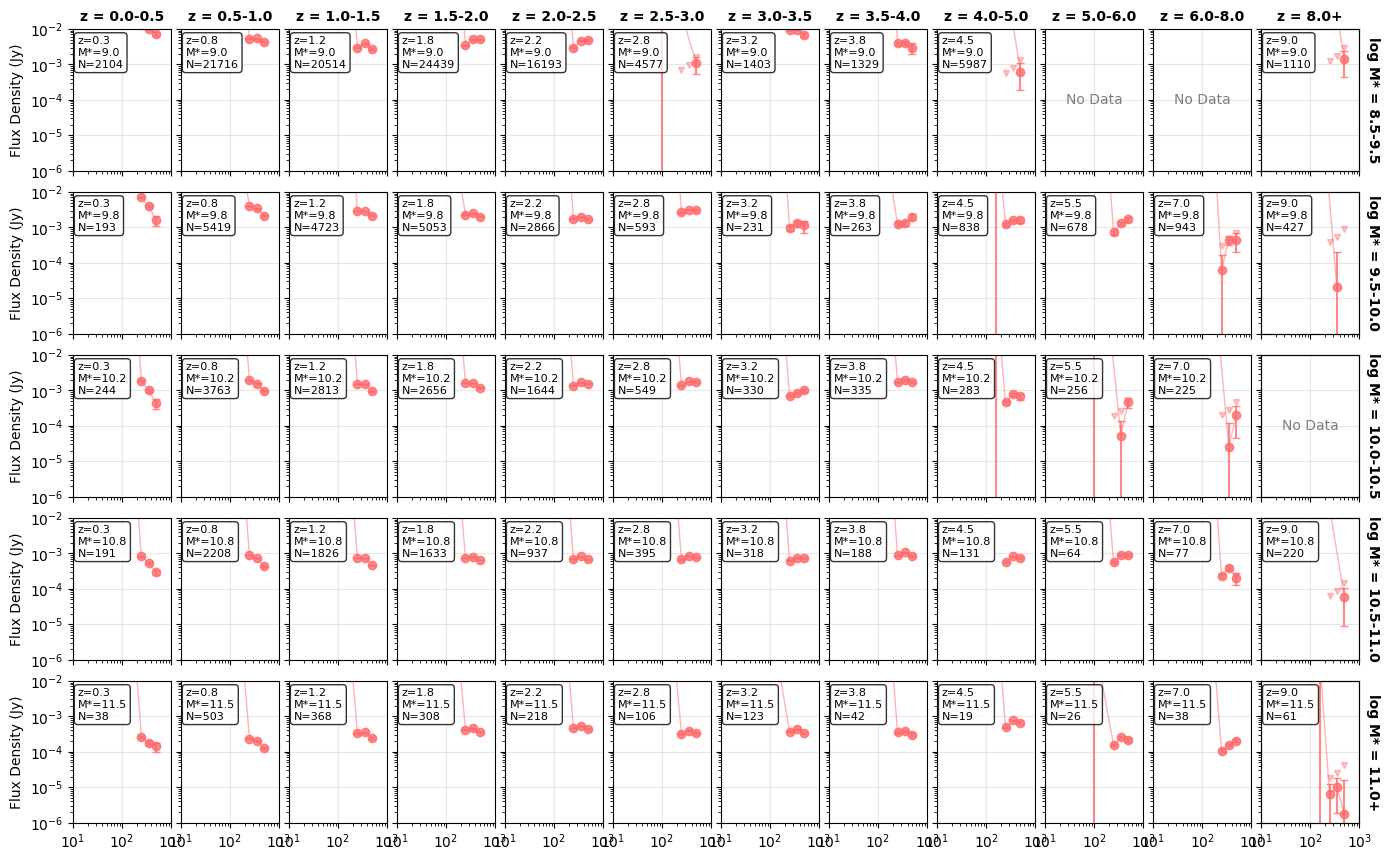

In [13]:
fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Star-forming')

📡 Available wavelengths: [100. 160. 250. 350. 500.] μm
📊 Grid dimensions: 12 redshift × 5 mass bins
🔍 Redshift bins: [np.float64(0.01), np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0), np.float64(3.5), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(8.0)]
⭐ Mass bins: [np.float64(8.5), np.float64(9.5), np.float64(10.0), np.float64(10.5), np.float64(11.0)]


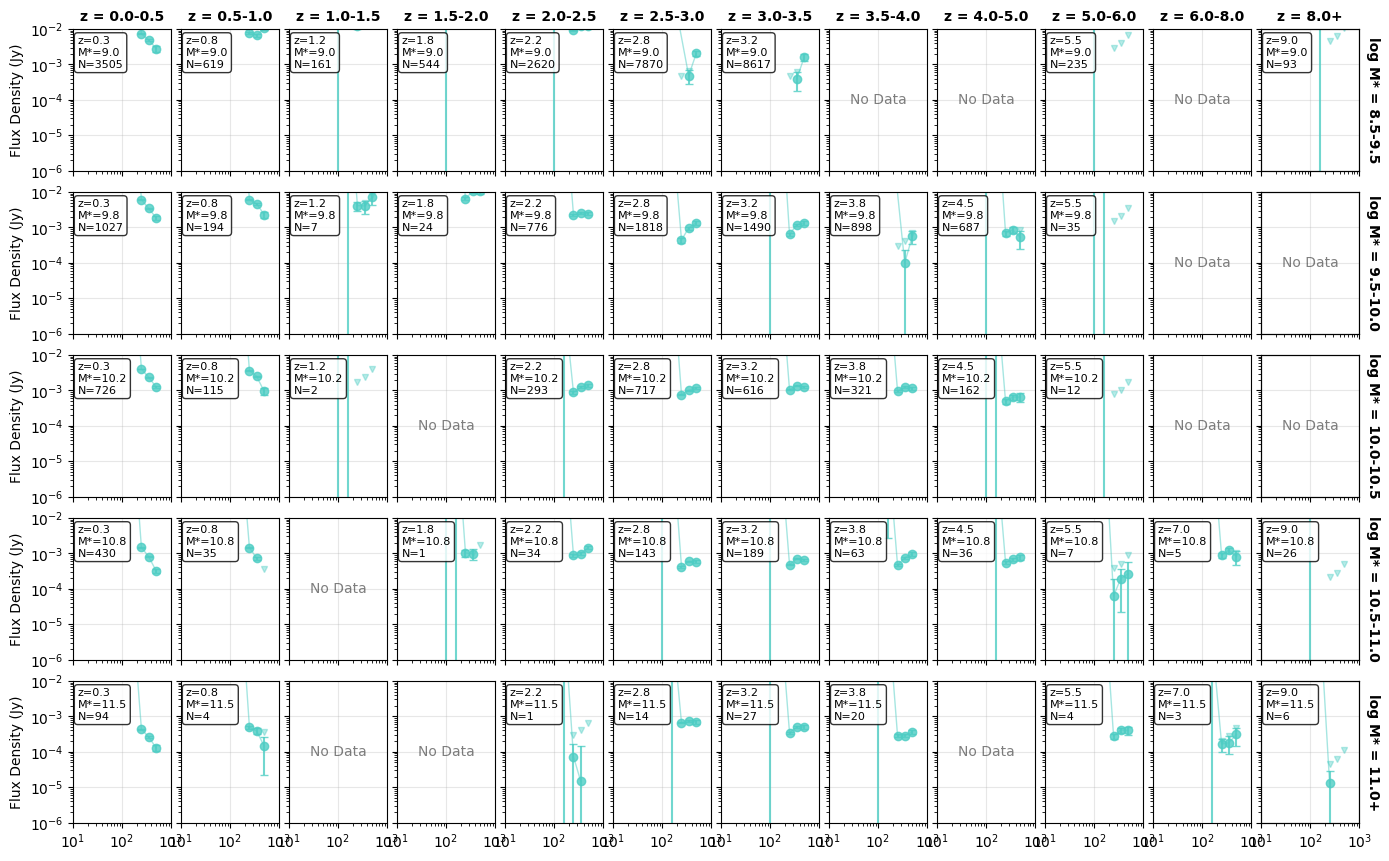

In [14]:
fig = create_sed_grid_plot(summary_df, detailed_results, population_type='Quiescent')

In [15]:
summary_df

,population_id,n_sources,median_redshift,median_log_mass,n_bands,total_ir_luminosity_lsun,sfr_msun_yr,specific_sfr_yr
0,redshift_0.01_0.50__stellar_mass_8.5_9.5__split_0,2104,0.36990,8.798365,5,0.019975,1.997544e-12,3.177836e-21
1,redshift_0.01_0.50__stellar_mass_8.5_9.5__split_1,3505,0.33130,8.903150,5,0.007675,7.675377e-13,9.592895e-22
2,redshift_0.01_0.50__stellar_mass_9.5_10.0__spl...,193,0.33390,9.699740,5,0.006725,6.725416e-13,1.342701e-22
3,redshift_0.01_0.50__stellar_mass_9.5_10.0__spl...,1027,0.33000,9.729010,5,0.005859,5.859086e-13,1.093503e-22
4,redshift_0.01_0.50__stellar_mass_10.0_10.5__sp...,244,0.34355,10.253015,5,0.001912,1.911716e-13,1.067599e-23
...,...,...,...,...,...,...,...,...
113,redshift_8.00_10.00__stellar_mass_10.0_10.5__s...,41,8.89850,10.196920,5,0.000000,0.000000e+00,0.000000e+00
114,redshift_8.00_10.00__stellar_mass_10.5_11.0__s...,220,9.38690,10.666475,5,2.441134,2.441134e-10,5.261585e-21
115,redshift_8.00_10.00__stellar_mass_10.5_11.0__s...,26,9.36230,10.660835,5,0.000130,1.299450e-14,2.837426e-25
116,redshift_8.00_10.00__stellar_mass_11.0_12.0__s...,61,9.16980,11.341060,5,0.203449,2.034486e-11,9.276724e-23
